### 문제(Problem), 시나리오

In [35]:
# 예제에서 사용할 엑셀은 아래와 같이 생겼습니다.

<img src="figures/038_회귀_지휘관_xlsx.PNG" alt="Drawing" style="width: 500px;"/>

In [36]:
# 차트 패키지를 import합니다.
import matplotlib.pyplot as plt
# plt.rcParams['figure.dpi'] = 180 # 차트 해상도 설정
# plt.rcParams['figure.figsize'] = [4, 3] # setting figure size
import seaborn as sns

In [37]:
%config InlineBackend.figure_format = 'svg'

In [38]:
# pandas: 데이터 조작 및 분석을 위한 라이브러리
import pandas as pd

In [39]:
# 엑셀에서 읽어와 보세요
df = pd.read_excel('data/038_회귀_지휘관.xlsx', sheet_name='data')

In [40]:
df.head()

,IQ,체력,가족수,키,잠재력
0,107,63,2,185,76
1,127,82,4,169,90
2,129,81,3,167,86
3,101,63,4,179,70
4,101,64,3,173,75


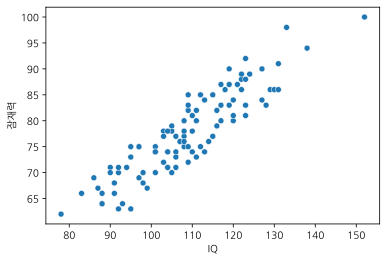

In [41]:
sns.scatterplot(x=df['IQ'], y=df['잠재력'])
# plt.title('Scatter Plot', fontsize=13)
plt.show()

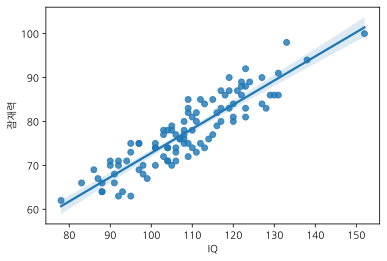

In [42]:
# Scatter Plot with regression line by seaborn regplot()
sns.regplot(x=df['IQ'], y=df['잠재력'], fit_reg=True)
#plt.title('Scatter Plot with Regression Line', fontsize=13)
plt.show()


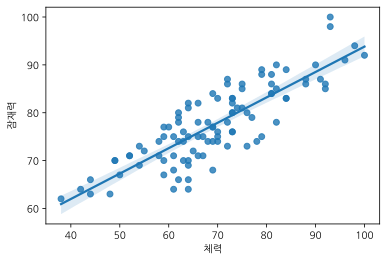

In [43]:
sns.regplot(x=df['체력'], y=df['잠재력'], fit_reg=True)
plt.show()

![Image](https://annalyzin.files.wordpress.com/2016/01/regression-residual-simulation-tutorial2.gif?w=561&amp;h=84)  
*source of image : https://www.kdnuggets.com/2016/04/regression-correlation-military-tutorial.html/2*

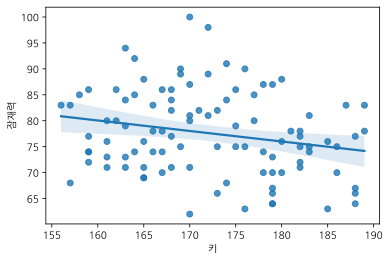

In [44]:
sns.regplot(x=df['키'], y=df['잠재력'], fit_reg=True)
plt.show()

In [45]:
# sns.regplot?

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   IQ      100 non-null    int64
 1   체력      100 non-null    int64
 2   가족수     100 non-null    int64
 3   키       100 non-null    int64
 4   잠재력     100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


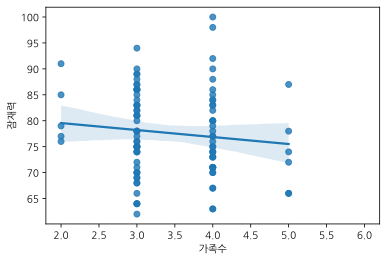

In [47]:
g = sns.regplot(x=df['가족수'], y=df['잠재력'], fit_reg=True)
g.set(xlim=(1.8, 6.2)) # x축이 안 예쁘서 그린다.
plt.show()

* 위 추세선은 큰 의미가 없다. 데이터를 반영한 추세선이 아니다.

### 예측 변수 비교 :

In [49]:
# 상관계수 확인
df.corr()

,IQ,체력,가족수,키,잠재력
IQ,1.000000,0.746922,-0.073570,-0.212427,0.902030
체력,0.746922,1.000000,-0.093621,-0.244116,0.837983
가족수,-0.073570,-0.093621,1.000000,0.024964,-0.114078
키,-0.212427,-0.244116,0.024964,1.000000,-0.222541
잠재력,0.902030,0.837983,-0.114078,-0.222541,1.000000


![Image](https://annalyzin.files.wordpress.com/2016/01/correlation-coefficient-tutorial-simulation.gif?w=669&amp;h=669)  
*source of image : https://www.kdnuggets.com/2016/04/regression-correlation-military-tutorial.html/*

In [50]:
df['combined_attr'] = 0.9*df.IQ + 0.74*df.체력

In [51]:
df.head()

,IQ,체력,가족수,키,잠재력,combined_attr
0,107,63,2,185,76,142.92
1,127,82,4,169,90,174.98
2,129,81,3,167,86,176.04
3,101,63,4,179,70,137.52
4,101,64,3,173,75,138.26


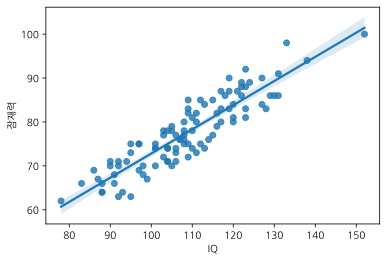

In [52]:
g = sns.regplot(x=df['IQ'], y=df['잠재력'], fit_reg=True)
#g.set(xlim=(1.8, 6.2)) # x축이 안 예쁘서 그린다.
plt.show()

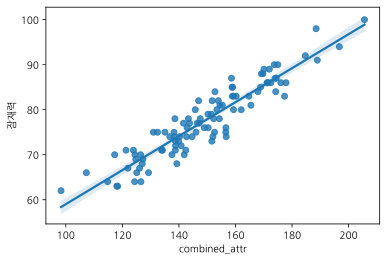

In [53]:
g = sns.regplot(x=df['combined_attr'], y=df['잠재력'], fit_reg=True)
#g.set(xlim=(1.8, 6.2)) # x축이 안 예쁘서 그린다.
plt.show()

In [54]:
df.corr()

,IQ,체력,가족수,키,잠재력,combined_attr
IQ,1.000000,0.746922,-0.073570,-0.212427,0.902030,0.949401
체력,0.746922,1.000000,-0.093621,-0.244116,0.837983,0.917955
가족수,-0.073570,-0.093621,1.000000,0.024964,-0.114078,-0.088113
키,-0.212427,-0.244116,0.024964,1.000000,-0.222541,-0.242040
잠재력,0.902030,0.837983,-0.114078,-0.222541,1.000000,0.933964
combined_attr,0.949401,0.917955,-0.088113,-0.242040,0.933964,1.000000


In [55]:
dataset = df.values

In [56]:
#import numpy as np
#import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [57]:
df.head()

,IQ,체력,가족수,키,잠재력,combined_attr
0,107,63,2,185,76,142.92
1,127,82,4,169,90,174.98
2,129,81,3,167,86,176.04
3,101,63,4,179,70,137.52
4,101,64,3,173,75,138.26


In [58]:
y = dataset[:,4]

### IQ만 사용

In [59]:
X = dataset[:,0:1]
X_train, y_train = X, y
estimator = LinearRegression()
estimator.fit(X_train, y_train)

y_predict = estimator.predict(X_train) 
r2 = metrics.r2_score(y_train, y_predict)
print(r2) #1.0

0.8136584198061415


### combined_attr 사용

In [60]:
X = dataset[:,5:6]

In [61]:
X[:3]

array([[142.92],
       [174.98],
       [176.04]])

In [62]:
X_train, y_train = X, y
estimator = LinearRegression()
estimator.fit(X_train, y_train)

y_predict = estimator.predict(X_train) 
r2 = metrics.r2_score(y_train, y_predict)
print(r2) #1.0

0.8722892008221459


# IQ, 체력 사용

In [63]:
df.head()

,IQ,체력,가족수,키,잠재력,combined_attr
0,107,63,2,185,76,142.92
1,127,82,4,169,90,174.98
2,129,81,3,167,86,176.04
3,101,63,4,179,70,137.52
4,101,64,3,173,75,138.26


In [64]:
X = dataset[:,0:2]
y = dataset[:,4]

In [65]:
X[:3]

array([[107.,  63.],
       [127.,  82.],
       [129.,  81.]])

In [66]:
X_train, y_train = X, y
estimator = LinearRegression()
estimator.fit(X_train, y_train)

y_predict = estimator.predict(X_train) 
r2 = metrics.r2_score(y_train, y_predict)
print(r2) #1.0

0.8746698176081334


In [67]:
estimator.coef_, estimator.intercept_ 

(array([0.38105772, 0.23537992]), 19.83040879976656)

In [68]:
#estimator?